This is a playground for coordinate mapping

In [1]:
import os
import pyexiv2
import numpy as np
import georef2
import matplotlib.pyplot as plt

In [2]:
ORIGIN_PATH = "DJI_202508081433_021_PineIslandbog5H3m5x3photo/DJI_20250808143604_0001_D_Waypoint1.JPG"
FORWARD_DIR_PATH = "DJI_202508081433_021_PineIslandbog5H3m5x3photo/DJI_20250808143611_0002_D_Waypoint2.JPG"

# basis = georef2.find_basis(ORIGIN_PATH, FORWARD_DIR_PATH)
TL = georef2.find_point_projection((-5280/2, 3956/2), 5280, 3956, 3, np.radians(-60))
TR = georef2.find_point_projection((5280/2, 3956/2), 5280, 3956, 3, np.radians(-60))
BR = georef2.find_point_projection((5280/2, -3956/2), 5280, 3956, 3, np.radians(-60))
BL = georef2.find_point_projection((-5280/2, -3956/2), 5280, 3956, 3, np.radians(-60))

print("TL", TL[0], TL[1])
print("TR", TR[0], TR[1])
print("BR", BR[0], BR[1])
print("BL", BL[0], BL[1])

yaw = float(pyexiv2.Image(FORWARD_DIR_PATH).read_xmp()['Xmp.drone-dji.FlightYawDegree'])
yaw = -np.radians(yaw)

rTL = TL[0] * np.cos(yaw) - TL[1] * np.sin(yaw), TL[0] * np.sin(yaw) - TL[1] * np.cos(yaw)
rTR = TR[0] * np.cos(yaw) - TR[1] * np.sin(yaw), TR[0] * np.sin(yaw) - TR[1] * np.cos(yaw)
rBR = BR[0] * np.cos(yaw) - BR[1] * np.sin(yaw), (BR[0] * np.sin(yaw) - BR[1] * np.cos(yaw))
rBL = BL[0] * np.cos(yaw) - BR[1] * np.sin(yaw), BL[0] * np.sin(yaw) - BR[1] * np.cos(yaw)
# print(rTR[0])
# print(rTR[1])


TL -3.4513652932622705 4.71559250002017
TR 3.4513652932622705 4.71559250002017
BR 1.854302342182582 0.12909433144271817
BL -1.854302342182582 0.12909433144271817


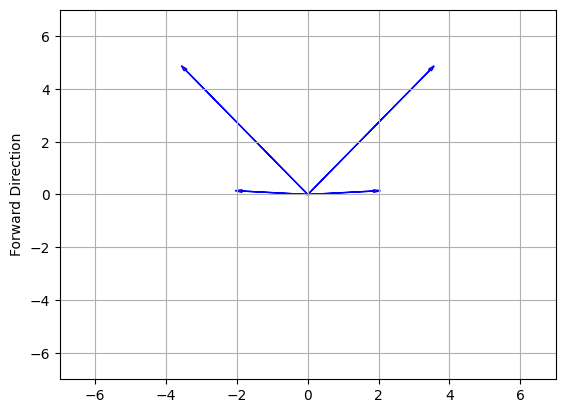

In [3]:
fig, ax = plt.subplots()

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.grid(True)
plt.ylabel("Forward Direction")

ax.arrow(0, 0, TL[0], TL[1], head_width=0.1, head_length=0.2, fc='red', ec='blue')
ax.arrow(0, 0, TR[0], TR[1], head_width=0.1, head_length=0.2, fc='red', ec='blue')
ax.arrow(0, 0, BR[0], BR[1], head_width=0.1, head_length=0.2, fc='red', ec='blue')
ax.arrow(0, 0, BL[0], BL[1], head_width=0.1, head_length=0.2, fc='red', ec='blue')
plt.show()